In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
nfl = pd.read_csv('NFL_thru_week_18.csv' )

In [4]:
nfl.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary
0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0
1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0
2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,6500.0
3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0
4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0


In [5]:
nfl.tail()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary
8020,18,2021,7002,Atlanta,Def,atl,h,nor,0.0,3300.0
8021,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.0,4200.0
8022,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.0,3700.0
8023,18,2021,7005,Carolina,Def,car,a,tam,-3.0,3400.0
8024,18,2021,7012,Green Bay,Def,gnb,a,det,-3.0,4300.0


In [6]:
#nfl['home_dummy'] = if(nfl['h/a'] == 'h'): 1 else 0

nfl['home_dummy'] = pd.get_dummies( nfl['h/a'] )['h']
    
nfl.head()
nfl.tail()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy
8020,18,2021,7002,Atlanta,Def,atl,h,nor,0.0,3300.0,1
8021,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.0,4200.0,0
8022,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.0,3700.0,1
8023,18,2021,7005,Carolina,Def,car,a,tam,-3.0,3400.0,0
8024,18,2021,7012,Green Bay,Def,gnb,a,det,-3.0,4300.0,0


In [7]:
nfl.Pos.value_counts()

QB = nfl[nfl.Pos == 'QB']
RB = nfl[nfl.Pos == 'RB']
WR = nfl[nfl.Pos == 'WR']
TE = nfl[nfl.Pos == 'TE']
Def= nfl[nfl.Pos == 'Def']


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

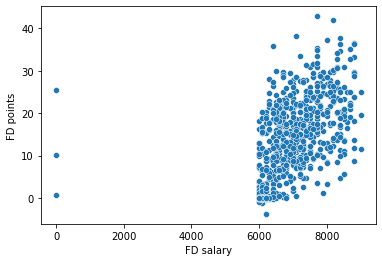

In [8]:
sns.scatterplot( x=QB['FD salary'] , y=QB['FD points'] )


In [9]:
### Looks like some data quality problems...
### Let's look at those observations

QB[QB['FD salary'] == 0  ]


,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy
2789,7,2021,1576,"White, Mike",QB,nyj,a,nwe,10.08,0.0,0
3185,8,2021,1320,"Johnson, Josh",QB,nyj,h,cin,0.68,0.0,1
3601,9,2021,1320,"Johnson, Josh",QB,nyj,a,ind,25.48,0.0,0


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

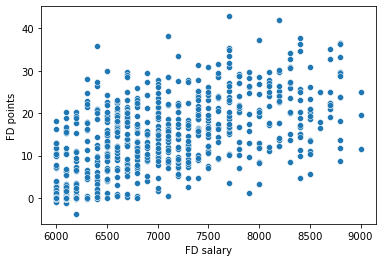

In [10]:
## After a little research on the fanduel.com website, it won't be easy to find these salaries...
## So, let's just drop these three values, which are only a small percentage of the data

QB = QB[ QB['FD salary'] > 0 ]

sns.scatterplot( x=QB['FD salary'] , y=QB['FD points'] )


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

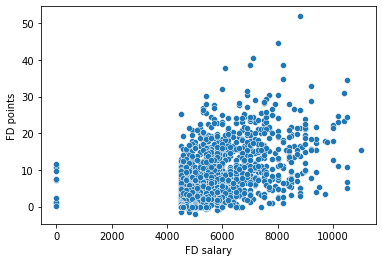

In [11]:
sns.scatterplot( x=RB['FD salary'] , y=RB['FD points'] )

In [12]:
### Again some data with 0 for the FD salary...

RB[RB['FD salary'] == 0  ]   ### Looks like 9 RB values are missing the salary

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy
2450,6,2021,5961,"Stanton, Johnny",RB,cle,h,ari,1.1,0.0,1
2864,7,2021,5963,"Gore, Derrick",RB,kan,a,ten,1.2,0.0,0
3215,8,2021,5963,"Gore, Derrick",RB,kan,h,nyg,10.8,0.0,1
3229,8,2021,5950,"Igwebuike, Godwin",RB,det,h,phi,7.3,0.0,1
3695,9,2021,5963,"Gore, Derrick",RB,kan,h,gnb,2.4,0.0,1
4071,10,2021,5950,"Igwebuike, Godwin",RB,det,a,pit,11.6,0.0,0
4544,11,2021,5950,"Igwebuike, Godwin",RB,det,a,cle,0.1,0.0,0
4930,12,2021,5887,"Walter, Austin",RB,nyj,a,hou,9.8,0.0,0
5373,13,2021,2553,"Peterson, Adrian",RB,sea,h,sfo,7.6,0.0,1


In [13]:
### Drop these missing values of salary:

RB = RB[ RB['FD salary'] > 0 ]


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

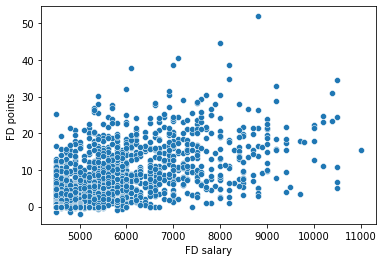

In [14]:
sns.scatterplot( x=RB['FD salary'] , y=RB['FD points'] )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

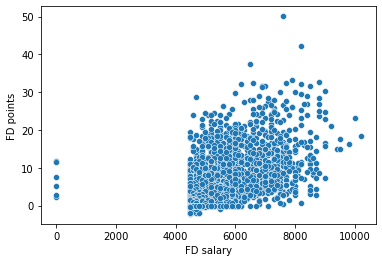

In [15]:
sns.scatterplot( x=WR['FD salary'] , y=WR['FD points'] )

In [16]:
WR[ WR['FD salary'] == 0 ]  ### Just 6 observations with missing salary. We can drop these observations.


,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy
189,1,2021,3851,"Amendola, Danny",WR,hou,h,jac,11.9,0.0,1
1191,3,2021,5212,"Stills, Kenny",WR,nor,a,nwe,2.2,0.0,0
2130,5,2021,5212,"Stills, Kenny",WR,nor,a,was,2.8,0.0,0
3326,8,2021,5816,"Grayson, Cyril",WR,tam,a,nor,11.5,0.0,0
5921,14,2021,5981,"Montgomery, D.J.",WR,nyj,h,nor,5.1,0.0,1
7288,17,2021,5853,"Swain, Freddie",WR,sea,h,det,7.5,0.0,1


In [17]:
WR = WR[ WR['FD salary'] > 0 ]

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

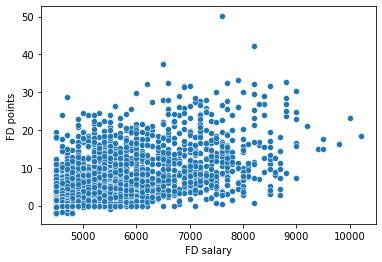

In [18]:
sns.scatterplot( x=WR['FD salary'] , y=WR['FD points'] )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

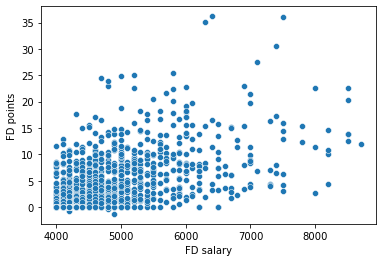

In [19]:
sns.scatterplot( x=TE['FD salary'] , y=TE['FD points'] )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

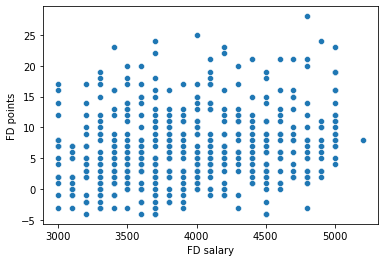

In [20]:
sns.scatterplot( x=Def['FD salary'] , y=Def['FD points'] )

In [21]:
Def.groupby('FD salary')['FD points'].mean()

FD salary
3000.0     6.444444
3100.0     2.142857
3200.0     4.761905
3300.0     4.965517
3400.0     5.406250
3500.0     6.027027
3600.0     5.718750
3700.0     5.696970
3800.0     6.000000
3900.0     5.100000
4000.0     6.275000
4100.0     8.000000
4200.0     7.071429
4300.0     8.142857
4400.0     7.111111
4500.0     5.848485
4600.0     7.833333
4700.0     8.933333
4800.0     7.500000
4900.0     7.923077
5000.0    11.950000
5200.0     8.000000
Name: FD points, dtype: float64

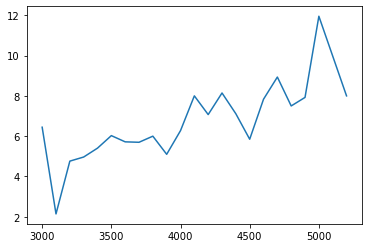

In [22]:
plt.plot( Def.groupby('FD salary')['FD points'].mean()  )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

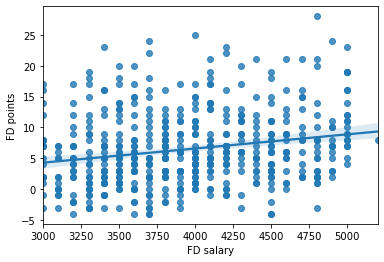

In [23]:
sns.regplot( x=Def['FD salary'] , y=Def['FD points'] )

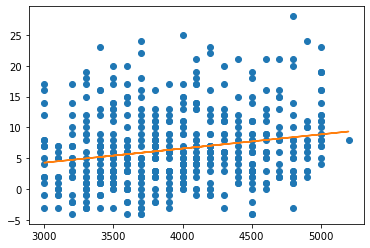

In [24]:
x = Def['FD salary']
y = Def['FD points']

plt.plot(x,y,'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)



Text(0, 0.5, 'Avg FD points')

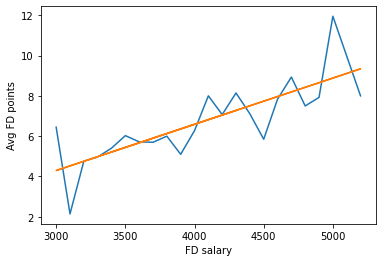

In [25]:
plt.plot( Def.groupby('FD salary')['FD points'].mean()  )

plt.plot(x, m*x+b)

plt.xlabel('FD salary')
plt.ylabel('Avg FD points')


In [26]:
def plot_scatter_and_regression_line(x, y, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].plot(x, y, '.')
    
    m, b = np.polyfit(x, y, 1)
    axes[0].plot(x, m*x+b)
    
    df = pd.DataFrame({'x':x , 'y':y })
    
    axes[1].plot( df.groupby('x')['y'].mean()  )
    axes[1].plot(x, m*x+b)
    
    fig.suptitle(title, fontsize=20)
    
    axes[0].set_xlabel('FD Salary')
    axes[1].set_xlabel('FD Salary')
    
    axes[0].set_ylabel('FD Points')
    axes[1].set_ylabel('FD Points')
    
    

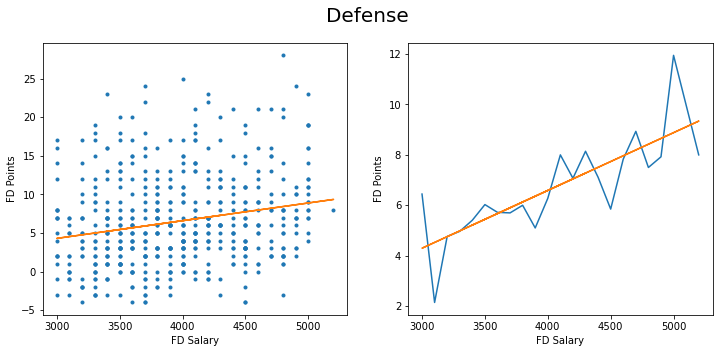

In [27]:
plot_scatter_and_regression_line( Def['FD salary'] , Def['FD points'] , 'Defense' )

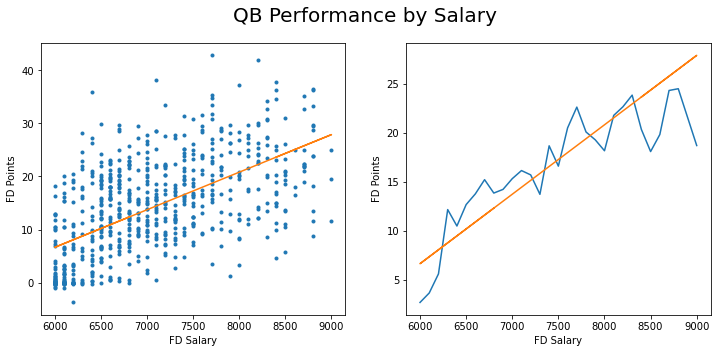

In [28]:
plot_scatter_and_regression_line( QB['FD salary'] , QB['FD points'] , 'QB Performance by Salary' )

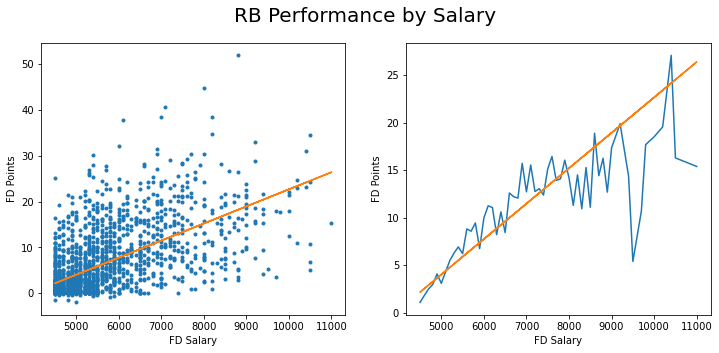

In [29]:
plot_scatter_and_regression_line( RB['FD salary'] , RB['FD points'] , 'RB Performance by Salary' )

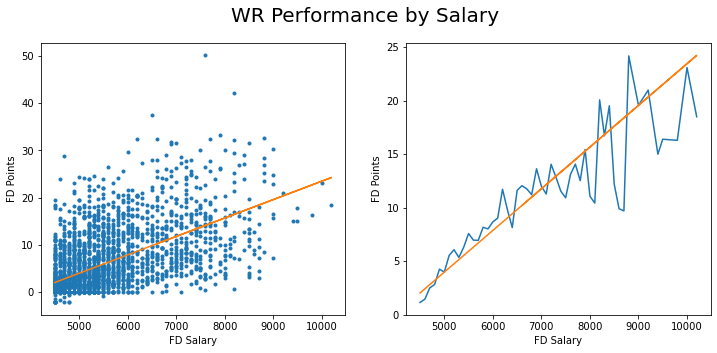

In [30]:
plot_scatter_and_regression_line( WR['FD salary'] , WR['FD points'] , 'WR Performance by Salary' )

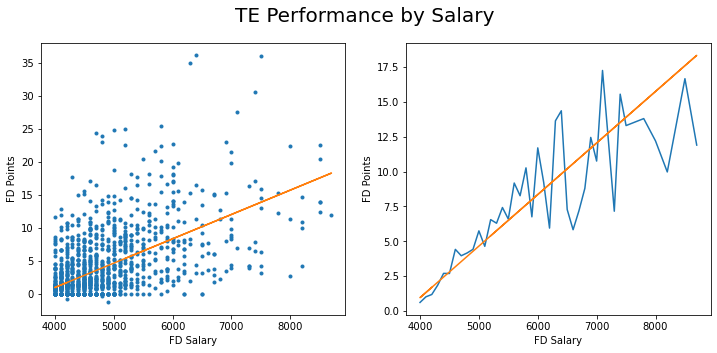

In [31]:

plot_scatter_and_regression_line( TE['FD salary'] , TE['FD points'] , 'TE Performance by Salary' )


In [32]:
x = TE['FD salary']
y = TE['FD points']

np.polyfit(x,y,2)



array([-5.66389483e-07,  9.87241700e-03, -2.99418679e+01])

In [33]:
def plot_scatter_and_regression_line2(x, y, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].plot(x, y, '.')
    
    x2 = x.unique()
    x2.sort()
    
    q, m, b = np.polyfit(x, y, 2)
    axes[0].plot(x2, q*x2*x2+m*x2+b, '.-')
    
    df = pd.DataFrame({'x':x , 'y':y })
    
    axes[1].plot( df.groupby('x')['y'].mean()  )
    axes[1].plot(x2, b + m*x2 + q*x2*x2, '.-')
    
    fig.suptitle(title, fontsize=20)
    
    axes[0].set_xlabel('FD Salary')
    axes[1].set_xlabel('FD Salary')
    
    axes[0].set_ylabel('FD Points')
    axes[1].set_ylabel('FD Points')



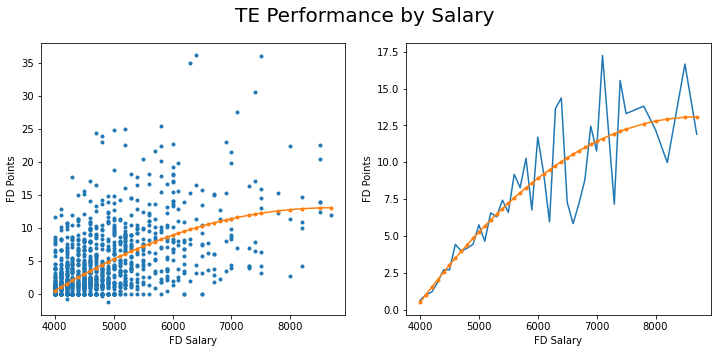

In [34]:
plot_scatter_and_regression_line2( TE['FD salary'] , TE['FD points'] , 'TE Performance by Salary' )

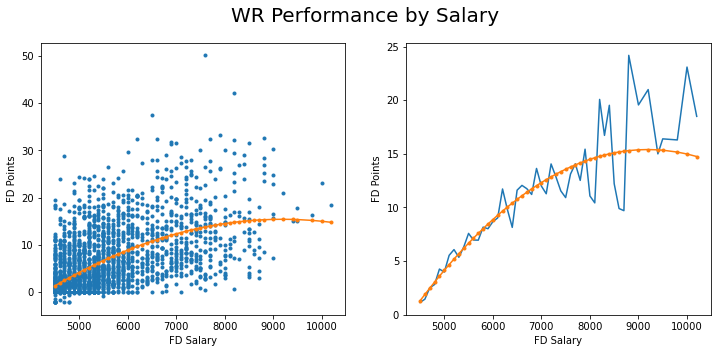

In [35]:
plot_scatter_and_regression_line2( WR['FD salary'] , WR['FD points'] , 'WR Performance by Salary' )


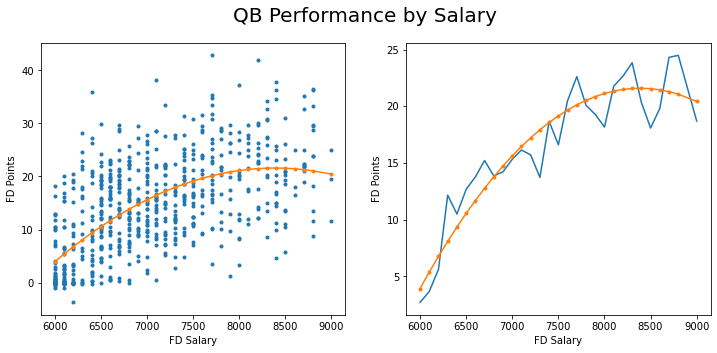

In [36]:
plot_scatter_and_regression_line2( QB['FD salary'] , QB['FD points'] , 'QB Performance by Salary' )

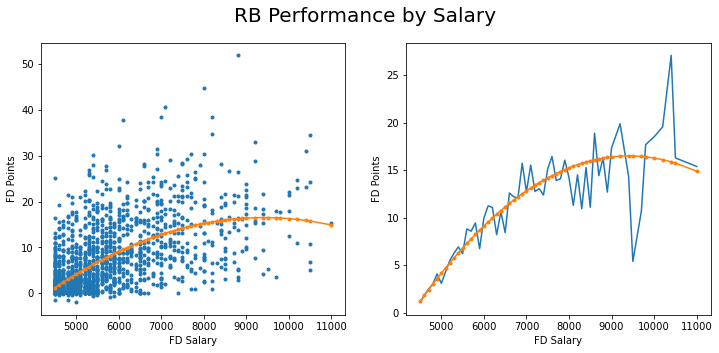

In [37]:
plot_scatter_and_regression_line2( RB['FD salary'] , RB['FD points'] , 'RB Performance by Salary' )


In [38]:
### Does home/away matter?

nfl.groupby(['Pos','h/a'])['FD points'].mean()

### At first glance it does look like home/away might matter, but average salaries might be different, too.


Pos  h/a
Def  a       6.158088
     h       6.786765
PK   a       7.943396
     h       8.267176
QB   a      13.707310
     h      14.080795
RB   a       5.828109
     h       6.018349
TE   a       3.342371
     h       3.380506
WR   a       5.461045
     h       5.644462
Name: FD points, dtype: float64

In [39]:
nfl.groupby(['Pos','h/a'])['FD salary'].mean()

### Differences here seem smaller and maybe not statistically significant.


Pos  h/a
Def  a      3956.985294
     h      3941.544118
PK   a              NaN
     h              NaN
QB   a      6994.152047
     h      6994.886364
RB   a      5477.092050
     h      5488.192268
TE   a      4646.910467
     h      4651.392405
WR   a      5392.525399
     h      5393.862816
Name: FD salary, dtype: float64

In [40]:
nfl.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy
0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,0
1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0,1
2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,6500.0,1
3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0,1
4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1


In [41]:
pd.get_dummies(nfl['Pos'])

,Def,PK,QB,RB,TE,WR
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
8020,1,0,0,0,0,0
8021,1,0,0,0,0,0
8022,1,0,0,0,0,0
8023,1,0,0,0,0,0


In [42]:
#nfl.groupby(['Name','Pos','Team']).sort_values('Week')['FD points'].shift(1)

nfl['LastFD'] = nfl.sort_values('Week').groupby(['Name','Pos','Team'])['FD points'].shift(1)


In [43]:
nfl['LastSalary'] = nfl.sort_values('Week').groupby(['Name','Pos','Team'])['FD salary'].shift(1)

In [44]:
nfl[nfl.Name == 'Brady, Tom']

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary
4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1,NaN,NaN
471,2,2021,1131,"Brady, Tom",QB,tam,h,atl,29.64,8200.0,1,29.16,7800.0
949,3,2021,1131,"Brady, Tom",QB,tam,a,lar,28.68,7800.0,0,29.64,8200.0
1442,4,2021,1131,"Brady, Tom",QB,tam,a,nwe,11.06,8100.0,0,28.68,7800.0
1889,5,2021,1131,"Brady, Tom",QB,tam,h,mia,37.74,8400.0,1,11.06,8100.0
2369,6,2021,1131,"Brady, Tom",QB,tam,a,phi,18.98,8700.0,0,37.74,8400.0
2773,7,2021,1131,"Brady, Tom",QB,tam,h,chi,24.44,8000.0,1,18.98,8700.0
3157,8,2021,1131,"Brady, Tom",QB,tam,a,nor,27.20,8300.0,0,24.44,8000.0
4024,10,2021,1131,"Brady, Tom",QB,tam,a,was,15.00,8300.0,0,27.20,8300.0
4435,11,2021,1131,"Brady, Tom",QB,tam,h,nyg,20.28,8000.0,1,15.00,8300.0


In [45]:
nfl[nfl.Name == 'Stafford, Matthew']

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary
9,1,2021,1340,"Stafford, Matthew",QB,lar,h,chi,24.34,7400.0,1,NaN,NaN
487,2,2021,1340,"Stafford, Matthew",QB,lar,a,ind,18.22,7500.0,0,24.34,7400.0
948,3,2021,1340,"Stafford, Matthew",QB,lar,h,tam,29.52,7600.0,1,18.22,7500.0
1429,4,2021,1340,"Stafford, Matthew",QB,lar,h,ari,20.30,7800.0,1,29.52,7600.0
1903,5,2021,1340,"Stafford, Matthew",QB,lar,a,sea,17.50,7900.0,0,20.30,7800.0
2360,6,2021,1340,"Stafford, Matthew",QB,lar,a,nyg,26.24,7900.0,0,17.50,7900.0
2771,7,2021,1340,"Stafford, Matthew",QB,lar,h,det,27.16,8100.0,1,26.24,7900.0
3159,8,2021,1340,"Stafford, Matthew",QB,lar,a,hou,24.20,8200.0,0,27.16,8100.0
3613,9,2021,1340,"Stafford, Matthew",QB,lar,h,ten,15.06,8400.0,1,24.20,8200.0
4027,10,2021,1340,"Stafford, Matthew",QB,lar,a,sfo,11.82,8000.0,0,15.06,8400.0


In [46]:
## nfl['Last5FD_mean'] = 

rolling3 = nfl.sort_values('Week').groupby(['Name','Pos','Team'])['FD points','FD salary'].rolling(3).mean().reset_index()

rolling3.head(10)


<ipython-input-46-b5ad9ba686dc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rolling3 = nfl.sort_values('Week').groupby(['Name','Pos','Team'])['FD points','FD salary'].rolling(3).mean().reset_index()


,Name,Pos,Team,level_3,FD points,FD salary
0,"Abdullah, Ameer",RB,car,3222,NaN,NaN
1,"Abdullah, Ameer",RB,car,3679,NaN,NaN
2,"Abdullah, Ameer",RB,car,4085,6.733333,4800.000000
3,"Abdullah, Ameer",RB,car,4532,4.233333,4900.000000
4,"Abdullah, Ameer",RB,car,4956,3.700000,4833.333333
5,"Abdullah, Ameer",RB,car,5802,2.766667,4933.333333
6,"Abdullah, Ameer",RB,car,6192,7.066667,4933.333333
7,"Abdullah, Ameer",RB,car,6718,6.733333,5066.666667
8,"Abdullah, Ameer",RB,car,7161,7.700000,5000.000000
9,"Abdullah, Ameer",RB,car,7613,7.433333,5066.666667


In [47]:
rolling3[rolling3.Name == 'Brady, Tom']


,Name,Pos,Team,level_3,FD points,FD salary
792,"Brady, Tom",QB,tam,4,NaN,NaN
793,"Brady, Tom",QB,tam,471,NaN,NaN
794,"Brady, Tom",QB,tam,949,29.160000,7933.333333
795,"Brady, Tom",QB,tam,1442,23.126667,8033.333333
796,"Brady, Tom",QB,tam,1889,25.826667,8100.000000
797,"Brady, Tom",QB,tam,2369,22.593333,8400.000000
798,"Brady, Tom",QB,tam,2773,27.053333,8366.666667
799,"Brady, Tom",QB,tam,3157,23.540000,8333.333333
800,"Brady, Tom",QB,tam,4024,22.213333,8200.000000
801,"Brady, Tom",QB,tam,4435,20.826667,8200.000000


In [48]:
rolling3small = rolling3[['level_3','FD points','FD salary']]

rolling3small.head()

rolling3small = rolling3small.rename(columns={'level_3':'index','FD points':'FD_MA3','FD salary':'Salary_MA3'})

rolling3small.head(10)

,index,FD_MA3,Salary_MA3
0,3222,NaN,NaN
1,3679,NaN,NaN
2,4085,6.733333,4800.000000
3,4532,4.233333,4900.000000
4,4956,3.700000,4833.333333
5,5802,2.766667,4933.333333
6,6192,7.066667,4933.333333
7,6718,6.733333,5066.666667
8,7161,7.700000,5000.000000
9,7613,7.433333,5066.666667


In [49]:
nfl.head()
nfl.tail()

nfl = nfl.reset_index()

nfl

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,0,NaN,NaN
1,1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0,1,NaN,NaN
2,2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,6500.0,1,NaN,NaN
3,3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0,1,NaN,NaN
4,4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8020,18,2021,7002,Atlanta,Def,atl,h,nor,0.00,3300.0,1,8.0,3000.0
8021,8021,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.00,4200.0,0,13.0,4000.0
8022,8022,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.00,3700.0,1,6.0,4300.0
8023,8023,18,2021,7005,Carolina,Def,car,a,tam,-3.00,3400.0,0,3.0,3600.0


In [50]:
nfl2 = pd.merge( nfl, rolling3small, on='index')

nfl2

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,0,NaN,NaN,NaN,NaN
1,1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0,1,NaN,NaN,NaN,NaN
2,2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,6500.0,1,NaN,NaN,NaN,NaN
3,3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0,1,NaN,NaN,NaN,NaN
4,4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8020,18,2021,7002,Atlanta,Def,atl,h,nor,0.00,3300.0,1,8.0,3000.0,3.666667,3366.666667
8021,8021,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.00,4200.0,0,13.0,4000.0,3.000000,4333.333333
8022,8022,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.00,3700.0,1,6.0,4300.0,6.333333,4333.333333
8023,8023,18,2021,7005,Carolina,Def,car,a,tam,-3.00,3400.0,0,3.0,3600.0,-0.333333,3433.333333


In [51]:
nfl2[nfl2.Name == 'Green Bay']

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3
468,468,1,2021,7012,Green Bay,Def,gnb,a,nor,-4.0,4500.0,0,NaN,NaN,NaN,NaN
929,929,2,2021,7012,Green Bay,Def,gnb,h,det,6.0,4200.0,1,-4.0,4500.0,NaN,NaN
1395,1395,3,2021,7012,Green Bay,Def,gnb,a,sfo,7.0,4000.0,0,6.0,4200.0,3.000000,4233.333333
1863,1863,4,2021,7012,Green Bay,Def,gnb,h,pit,7.0,4200.0,1,7.0,4000.0,6.666667,4133.333333
2335,2335,5,2021,7012,Green Bay,Def,gnb,a,cin,7.0,4100.0,0,7.0,4200.0,7.000000,4100.000000
2753,2753,6,2021,7012,Green Bay,Def,gnb,a,chi,7.0,4200.0,0,7.0,4100.0,7.000000,4166.666667
3131,3131,7,2021,7012,Green Bay,Def,gnb,h,was,14.0,4100.0,1,7.0,4200.0,9.333333,4133.333333
3577,3577,8,2021,7012,Green Bay,Def,gnb,a,ari,8.0,3400.0,0,14.0,4100.0,9.666667,3900.000000
3999,3999,9,2021,7012,Green Bay,Def,gnb,a,kan,5.0,3600.0,0,8.0,3400.0,9.000000,3700.000000
4400,4400,10,2021,7012,Green Bay,Def,gnb,h,sea,17.0,3900.0,1,5.0,3600.0,10.000000,3633.333333


In [52]:
nfl2[nfl2.Name == 'Brady, Tom']


,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3
4,4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1,NaN,NaN,NaN,NaN
471,471,2,2021,1131,"Brady, Tom",QB,tam,h,atl,29.64,8200.0,1,29.16,7800.0,NaN,NaN
949,949,3,2021,1131,"Brady, Tom",QB,tam,a,lar,28.68,7800.0,0,29.64,8200.0,29.160000,7933.333333
1442,1442,4,2021,1131,"Brady, Tom",QB,tam,a,nwe,11.06,8100.0,0,28.68,7800.0,23.126667,8033.333333
1889,1889,5,2021,1131,"Brady, Tom",QB,tam,h,mia,37.74,8400.0,1,11.06,8100.0,25.826667,8100.000000
2369,2369,6,2021,1131,"Brady, Tom",QB,tam,a,phi,18.98,8700.0,0,37.74,8400.0,22.593333,8400.000000
2773,2773,7,2021,1131,"Brady, Tom",QB,tam,h,chi,24.44,8000.0,1,18.98,8700.0,27.053333,8366.666667
3157,3157,8,2021,1131,"Brady, Tom",QB,tam,a,nor,27.20,8300.0,0,24.44,8000.0,23.540000,8333.333333
4024,4024,10,2021,1131,"Brady, Tom",QB,tam,a,was,15.00,8300.0,0,27.20,8300.0,22.213333,8200.000000
4435,4435,11,2021,1131,"Brady, Tom",QB,tam,h,nyg,20.28,8000.0,1,15.00,8300.0,20.826667,8200.000000


In [53]:
nfl.iloc[3222]
nfl.iloc[3679]

index                    3679
Week                        9
Year                     2021
GID                      2995
Name          Abdullah, Ameer
Pos                        RB
Team                      car
h/a                         h
Oppt                      nwe
FD points                   5
FD salary                4900
home_dummy                  1
LastFD                    8.1
LastSalary               4600
Name: 3679, dtype: object

In [54]:
nfl2[nfl2.Name == 'Abdullah, Ameer']


,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3
96,96,1,2021,2995,"Abdullah, Ameer",RB,min,a,cin,2.9,4700.0,0,NaN,NaN,NaN,NaN
604,604,2,2021,2995,"Abdullah, Ameer",RB,min,a,ari,0.0,4600.0,0,2.9,4700.0,NaN,NaN
1040,1040,3,2021,2995,"Abdullah, Ameer",RB,min,h,sea,2.4,4700.0,1,0.0,4600.0,1.766667,4666.666667
1524,1524,4,2021,2995,"Abdullah, Ameer",RB,min,h,cle,0.7,4900.0,1,2.4,4700.0,1.033333,4733.333333
2004,2004,5,2021,2995,"Abdullah, Ameer",RB,min,h,det,0.2,4700.0,1,0.7,4900.0,1.100000,4766.666667
2468,2468,6,2021,2995,"Abdullah, Ameer",RB,min,a,car,0.0,4800.0,0,0.2,4700.0,0.300000,4800.000000
3222,3222,8,2021,2995,"Abdullah, Ameer",RB,car,a,atl,8.1,4600.0,0,NaN,NaN,NaN,NaN
3679,3679,9,2021,2995,"Abdullah, Ameer",RB,car,h,nwe,5.0,4900.0,1,8.1,4600.0,NaN,NaN
4085,4085,10,2021,2995,"Abdullah, Ameer",RB,car,a,ari,7.1,4900.0,0,5.0,4900.0,6.733333,4800.000000
4532,4532,11,2021,2995,"Abdullah, Ameer",RB,car,h,was,0.6,4900.0,1,7.1,4900.0,4.233333,4900.000000


In [55]:
CMA = nfl.sort_values('Week').groupby(['Name','Pos','Team'])[['FD points','FD salary']].expanding().mean()

CMA.head(15)

CMA.tail(10)


FD points    FD salary
Name             Pos Team                             
Zylstra, Brandon WR  car  4217   3.814286  4757.142857
                          4665   3.487500  4762.500000
                          5090   3.422222  4766.666667
                          5914   3.730000  4770.000000
                          6370   3.636364  4790.909091
                          7362   3.333333  4791.666667
                          7824   3.076923  4792.307692
Zylstra, Shane   TE  det  6035   2.800000  4000.000000
                          6495   2.450000  4150.000000
                          6996   1.633333  4200.000000

In [56]:
CMA2 = CMA.reset_index()
CMA2

CMAsmall = CMA2[['level_3','FD points','FD salary']]
CMAsmall = CMAsmall.rename(columns={'level_3':'index','FD points':'FD_CMA','FD salary':'Salary_CMA'})

CMAsmall


,index,FD_CMA,Salary_CMA
0,3222,8.100000,4600.000000
1,3679,6.550000,4750.000000
2,4085,6.733333,4800.000000
3,4532,5.200000,4825.000000
4,4956,4.840000,4800.000000
...,...,...,...
8020,7362,3.333333,4791.666667
8021,7824,3.076923,4792.307692
8022,6035,2.800000,4000.000000
8023,6495,2.450000,4150.000000


In [57]:
nfl3 = pd.merge(nfl2, CMAsmall, on='index')

nfl3

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3,FD_CMA,Salary_CMA
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,0,NaN,NaN,NaN,NaN,34.560000,8400.000000
1,1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0,1,NaN,NaN,NaN,NaN,33.280000,8800.000000
2,2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,6500.0,1,NaN,NaN,NaN,NaN,29.920000,6500.000000
3,3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0,1,NaN,NaN,NaN,NaN,29.620000,6700.000000
4,4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,1,NaN,NaN,NaN,NaN,29.160000,7800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8020,18,2021,7002,Atlanta,Def,atl,h,nor,0.00,3300.0,1,8.0,3000.0,3.666667,3366.666667,3.823529,3511.764706
8021,8021,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.00,4200.0,0,13.0,4000.0,3.000000,4333.333333,4.588235,3852.941176
8022,8022,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.00,3700.0,1,6.0,4300.0,6.333333,4333.333333,6.529412,3923.529412
8023,8023,18,2021,7005,Carolina,Def,car,a,tam,-3.00,3400.0,0,3.0,3600.0,-0.333333,3433.333333,5.235294,4029.411765


In [58]:
nfl3[nfl3.Name == 'Green Bay']

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3,FD_CMA,Salary_CMA
468,468,1,2021,7012,Green Bay,Def,gnb,a,nor,-4.0,4500.0,0,NaN,NaN,NaN,NaN,-4.000000,4500.000000
929,929,2,2021,7012,Green Bay,Def,gnb,h,det,6.0,4200.0,1,-4.0,4500.0,NaN,NaN,1.000000,4350.000000
1395,1395,3,2021,7012,Green Bay,Def,gnb,a,sfo,7.0,4000.0,0,6.0,4200.0,3.000000,4233.333333,3.000000,4233.333333
1863,1863,4,2021,7012,Green Bay,Def,gnb,h,pit,7.0,4200.0,1,7.0,4000.0,6.666667,4133.333333,4.000000,4225.000000
2335,2335,5,2021,7012,Green Bay,Def,gnb,a,cin,7.0,4100.0,0,7.0,4200.0,7.000000,4100.000000,4.600000,4200.000000
2753,2753,6,2021,7012,Green Bay,Def,gnb,a,chi,7.0,4200.0,0,7.0,4100.0,7.000000,4166.666667,5.000000,4200.000000
3131,3131,7,2021,7012,Green Bay,Def,gnb,h,was,14.0,4100.0,1,7.0,4200.0,9.333333,4133.333333,6.285714,4185.714286
3577,3577,8,2021,7012,Green Bay,Def,gnb,a,ari,8.0,3400.0,0,14.0,4100.0,9.666667,3900.000000,6.500000,4087.500000
3999,3999,9,2021,7012,Green Bay,Def,gnb,a,kan,5.0,3600.0,0,8.0,3400.0,9.000000,3700.000000,6.333333,4033.333333
4400,4400,10,2021,7012,Green Bay,Def,gnb,h,sea,17.0,3900.0,1,5.0,3600.0,10.000000,3633.333333,7.400000,4020.000000


In [59]:
nfl3['LastCMA']       = nfl3.sort_values('Week').groupby(['Name','Pos','Team'])['FD_CMA'].shift(1)
nfl3['LastSalaryCMA'] = nfl3.sort_values('Week').groupby(['Name','Pos','Team'])['Salary_CMA'].shift(1)


In [60]:
nfl3['FDLast3'] = nfl3.sort_values('Week').groupby(['Name','Pos','Team'])['FD_MA3'].shift(1)

In [61]:
nfl3[nfl3.Name == 'Green Bay']

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3,FD_CMA,Salary_CMA,LastCMA,LastSalaryCMA,FDLast3
468,468,1,2021,7012,Green Bay,Def,gnb,a,nor,-4.0,...,0,NaN,NaN,NaN,NaN,-4.000000,4500.000000,NaN,NaN,NaN
929,929,2,2021,7012,Green Bay,Def,gnb,h,det,6.0,...,1,-4.0,4500.0,NaN,NaN,1.000000,4350.000000,-4.000000,4500.000000,NaN
1395,1395,3,2021,7012,Green Bay,Def,gnb,a,sfo,7.0,...,0,6.0,4200.0,3.000000,4233.333333,3.000000,4233.333333,1.000000,4350.000000,NaN
1863,1863,4,2021,7012,Green Bay,Def,gnb,h,pit,7.0,...,1,7.0,4000.0,6.666667,4133.333333,4.000000,4225.000000,3.000000,4233.333333,3.000000
2335,2335,5,2021,7012,Green Bay,Def,gnb,a,cin,7.0,...,0,7.0,4200.0,7.000000,4100.000000,4.600000,4200.000000,4.000000,4225.000000,6.666667
2753,2753,6,2021,7012,Green Bay,Def,gnb,a,chi,7.0,...,0,7.0,4100.0,7.000000,4166.666667,5.000000,4200.000000,4.600000,4200.000000,7.000000
3131,3131,7,2021,7012,Green Bay,Def,gnb,h,was,14.0,...,1,7.0,4200.0,9.333333,4133.333333,6.285714,4185.714286,5.000000,4200.000000,7.000000
3577,3577,8,2021,7012,Green Bay,Def,gnb,a,ari,8.0,...,0,14.0,4100.0,9.666667,3900.000000,6.500000,4087.500000,6.285714,4185.714286,9.333333
3999,3999,9,2021,7012,Green Bay,Def,gnb,a,kan,5.0,...,0,8.0,3400.0,9.000000,3700.000000,6.333333,4033.333333,6.500000,4087.500000,9.666667
4400,4400,10,2021,7012,Green Bay,Def,gnb,h,sea,17.0,...,1,5.0,3600.0,10.000000,3633.333333,7.400000,4020.000000,6.333333,4033.333333,9.000000


In [62]:
nfl3[nfl3.Name == 'Brady, Tom']

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,home_dummy,LastFD,LastSalary,FD_MA3,Salary_MA3,FD_CMA,Salary_CMA,LastCMA,LastSalaryCMA,FDLast3
4,4,1,2021,1131,"Brady, Tom",QB,tam,h,dal,29.16,...,1,NaN,NaN,NaN,NaN,29.160000,7800.000000,NaN,NaN,NaN
471,471,2,2021,1131,"Brady, Tom",QB,tam,h,atl,29.64,...,1,29.16,7800.0,NaN,NaN,29.400000,8000.000000,29.160000,7800.000000,NaN
949,949,3,2021,1131,"Brady, Tom",QB,tam,a,lar,28.68,...,0,29.64,8200.0,29.160000,7933.333333,29.160000,7933.333333,29.400000,8000.000000,NaN
1442,1442,4,2021,1131,"Brady, Tom",QB,tam,a,nwe,11.06,...,0,28.68,7800.0,23.126667,8033.333333,24.635000,7975.000000,29.160000,7933.333333,29.160000
1889,1889,5,2021,1131,"Brady, Tom",QB,tam,h,mia,37.74,...,1,11.06,8100.0,25.826667,8100.000000,27.256000,8060.000000,24.635000,7975.000000,23.126667
2369,2369,6,2021,1131,"Brady, Tom",QB,tam,a,phi,18.98,...,0,37.74,8400.0,22.593333,8400.000000,25.876667,8166.666667,27.256000,8060.000000,25.826667
2773,2773,7,2021,1131,"Brady, Tom",QB,tam,h,chi,24.44,...,1,18.98,8700.0,27.053333,8366.666667,25.671429,8142.857143,25.876667,8166.666667,22.593333
3157,3157,8,2021,1131,"Brady, Tom",QB,tam,a,nor,27.20,...,0,24.44,8000.0,23.540000,8333.333333,25.862500,8162.500000,25.671429,8142.857143,27.053333
4024,4024,10,2021,1131,"Brady, Tom",QB,tam,a,was,15.00,...,0,27.20,8300.0,22.213333,8200.000000,24.655556,8177.777778,25.862500,8162.500000,23.540000
4435,4435,11,2021,1131,"Brady, Tom",QB,tam,h,nyg,20.28,...,1,15.00,8300.0,20.826667,8200.000000,24.218000,8160.000000,24.655556,8177.777778,22.213333


In [63]:
nfl4 = nfl3.drop(columns=['FD_CMA', 'Salary_CMA', 'FD_MA3'])

In [64]:
nfl4[nfl4.Name == 'Murray, Kyler']

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,home_dummy,LastFD,LastSalary,Salary_MA3,LastCMA,LastSalaryCMA,FDLast3
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,0,NaN,NaN,NaN,NaN,NaN,NaN
469,469,2,2021,1537,"Murray, Kyler",QB,ari,h,min,35.10,8700.0,1,34.56,8400.0,NaN,34.560000,8400.000000,NaN
960,960,3,2021,1537,"Murray, Kyler",QB,ari,a,jac,19.54,9000.0,0,35.10,8700.0,8700.000000,34.830000,8550.000000,NaN
1423,1423,4,2021,1537,"Murray, Kyler",QB,ari,a,lar,22.62,8200.0,0,19.54,9000.0,8633.333333,29.733333,8700.000000,29.733333
1909,1909,5,2021,1537,"Murray, Kyler",QB,ari,h,sfo,13.66,8500.0,1,22.62,8200.0,8566.666667,27.955000,8575.000000,25.753333
2362,2362,6,2021,1537,"Murray, Kyler",QB,ari,a,cle,25.76,8400.0,0,13.66,8500.0,8366.666667,25.096000,8560.000000,18.606667
2776,2776,7,2021,1537,"Murray, Kyler",QB,ari,h,hou,22.44,8700.0,1,25.76,8400.0,8533.333333,25.206667,8533.333333,20.680000
3179,3179,8,2021,1537,"Murray, Kyler",QB,ari,h,gnb,11.06,8500.0,1,22.44,8700.0,8533.333333,24.811429,8557.142857,20.620000
5311,5311,13,2021,1537,"Murray, Kyler",QB,ari,a,chi,30.82,8300.0,0,11.06,8500.0,8500.000000,23.092500,8550.000000,19.753333
5738,5738,14,2021,1537,"Murray, Kyler",QB,ari,h,lar,19.42,8500.0,1,30.82,8300.0,8433.333333,23.951111,8522.222222,21.440000


In [65]:
nfl4.to_csv('NFL_thru_week_18_with_FE.csv')